# Names of Earth Locations

This notebook records the names of Earth locations and their latitudes and longitudes.  It saves these names in a file data/geonames.ecsv.  This file is read
when the names are needed in other notebooks.

The latitude and longitude values were obtained from {term}`GeoNames` filtering for code `ANS` (Archeological/prehistoric site) to help eliminate multiple options.

The output file format is ECSV {cite:p}`aldcroft_astropy-apesape6rst_2021`.

In [75]:
#import asyncio
#asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

from astropy.table import Table

# Define the data as an ecsv file.
geonames = '''# %ECSV 0.9
# ---
# datatype:
# - 
#   name: Place
#   unit: string 
#   datatype: string
#   format: '%030s'
#   description: This is the name of the place
# - 
#   name: Latitude
#   unit: degree
#   datatype: float64
#   description: This is latitude of the place
# - 
#   name: Longitude
#   unit: degree
#   datatype: float64
#   description: This is longitude of the place
# -
#   name: Source
#   unit: string
#   datatype: string
#   description: The url to retrieve the data for the Place
# -
#   name: Label
#   unit: string
#   datatype: string
#   description: An ordered name based on latitude with current city
# meta:
#   name: geonames.ecsv
#   Description: Earth place names with latitude and longitude
#   Source: https://geonames.org
Place Latitude Longitude Source Label
Heliopolis 30.15 31.31667 https://www.geonames.org/355956/heliopolis.html 30.1-Heliopolis
Memphis 29.8667 31.25 https://www.geonames.org/352547/memphis.html 29.9-Memphis
Illahun 29.23629 30.9709 https://www.geonames.org/353349/pyramid-of-el-lahun.html 29.2-Illahun(Faiyum)
Thebes 25.7 32.68333 https://www.geonames.org/347342/thebes.html 25.7-Thebes(Luxor)
Elephantine 24.0943 32.8938 https://www.geonames.org/6499061/elephantine-island-resort-aswan.html 24.1-Elephantine
'''

# Create an AstroPy Table from the data.
names = Table.read(geonames, format='ascii.ecsv')
#%store names

# Write the names Table as an escv file to be used in other notebooks.
#names.write('../data/geonames.ecsv', overwrite=True)

# Read the file to display its contents in this notebook.
# This step is not necessary, but it tests that the file was created and read.
# This is the method I will use to read this data into other notebooks.
#displaynames = Table.read('../data/geonames.ecsv')
displaynames = names

# Display the conents
displaynames

Place,Latitude,Longitude,Source,Label
string,deg,deg,string,string
str11,float64,float64,str69,str20
Heliopolis,30.15,31.31667,https://www.geonames.org/355956/heliopolis.html,30.1-Heliopolis
Memphis,29.8667,31.25,https://www.geonames.org/352547/memphis.html,29.9-Memphis
Illahun,29.23629,30.9709,https://www.geonames.org/353349/pyramid-of-el-lahun.html,29.2-Illahun(Faiyum)
Thebes,25.7,32.68333,https://www.geonames.org/347342/thebes.html,25.7-Thebes(Luxor)
Elephantine,24.0943,32.8938,https://www.geonames.org/6499061/elephantine-island-resort-aswan.html,24.1-Elephantine


# Create a map of the places listed in the displaynames Table.

<Axes: >

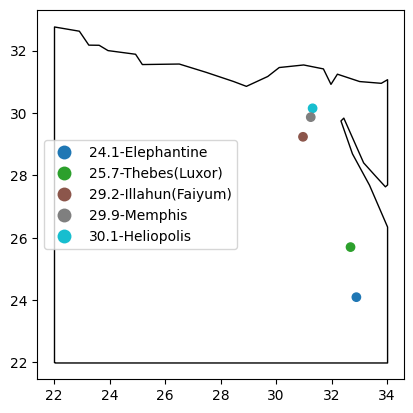

In [79]:
# Import Libraries
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt
from geodatasets import get_path

df = pd.DataFrame(
    {
        "City": displaynames['Place'],
        "Latitude": displaynames['Latitude'],
        "Longitude": displaynames['Longitude'],
        "Label": displaynames['Label'],
    }
)

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([22, 22, 34, 34]).plot(color="white", edgecolor="black")

#ax = folium.Map(location=[29.1, 30.0], tiles="CartoDB Positron", zoom_start=9)
#ax = folium.Map(location=[29.1, 30.0], tiles="OpenStreetMap", zoom_start=9)

# We can now plot our ``GeoDataFrame``.
#gdf.plot(ax=ax, color="red")
gdf.plot(ax=ax, column="Label", legend=True, legend_kwds={'loc': 'center left'})




In [78]:
print(gdf.head())

          City  Latitude  Longitude                 Label  \
0   Heliopolis  30.15000   31.31667       30.1-Heliopolis   
1      Memphis  29.86670   31.25000          29.9-Memphis   
2      Illahun  29.23629   30.97090  29.2-Illahun(Faiyum)   
3       Thebes  25.70000   32.68333    25.7-Thebes(Luxor)   
4  Elephantine  24.09430   32.89380      24.1-Elephantine   

                   geometry  
0    POINT (31.31667 30.15)  
1     POINT (31.25 29.8667)  
2  POINT (30.9709 29.23629)  
3     POINT (32.68333 25.7)  
4   POINT (32.8938 24.0943)  
